# Übung Histogramme

In [15]:
# package import
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
# Bilddatei einladen
img_Abdomen = cv2.imread(r'images/CT_Abdomen.jpg', cv2.IMREAD_GRAYSCALE)

#Datentyp:
imageDataType = img_Abdomen.dtype
#Bildgröße
imageShape = img_Abdomen.shape

# Ausgabe der Daten
print(f'Datentyp des Bildes: {imageDataType}')
print(f'Größe des Bildes: {imageShape}')

# Anzeige des Bildes
fig = px.imshow(img_Abdomen, color_continuous_scale='gray')

fig.show()

Datentyp des Bildes: uint8
Größe des Bildes: (881, 1339)


### Berechnung der Kenngrößen des Bildes

#### Mittlere Helligkeit

Definieren sie dazu die Funbktion `calc_image_mean` die das Bild als Eingabeparameter hat und die mittlere Helligkeit aller Pixel berechnet. Verwenden Sie hierfür bitte keine vorprogrammierte Python Funktion.

In [17]:
# Funktion zur Berechnung der mittleren Helligkeit des Bildes
def calc_image_mean(image):
    # größe Bestimmen
    height = image.shape[0]
    width = image.shape[1]
    summe = 0

    for u in range(height):
        for v in range(width):
            summe = summe+int(image[u,v])
    image_Mean = summe / (width*height)
    return image_Mean



In [18]:
# Berechnen Sie die mittlere Helligkeit des Bildes
print(calc_image_mean(img_Abdomen))
print(np.mean(img_Abdomen))

70.68283546346868
70.68283546346868


#### Varianz

Definieren sie dazu die Funbktion `calc_image_variance` die das Bild als Eingabeparameter hat und die Varianz des Bildes berechnet. Verwenden Sie dazu auch die Funktion `calc_image_mean`

In [19]:
# Varianz
def calc_image_var(image):
    # größe Bestimmen
    height = image.shape[0]
    width = image.shape[1]
    summe = 0
    # Mittelwert
    image_mean = calc_image_mean(image)
    for u in range(height):
        for v in range(width):
            summe += (image_mean-int(image[u,v]))**2
    var = summe / (height*width) 
    return var


In [20]:
# Berechnen Sie die Varianz des Bildes
print(calc_image_var(img_Abdomen))
print(np.var(img_Abdomen))

4706.820940793774
4706.820940761114


In [21]:
img_stones1 = cv2.imread(r'images/stones1.jpg', cv2.IMREAD_GRAYSCALE)
img_stones2 = cv2.imread(r'images/stones2.jpg', cv2.IMREAD_GRAYSCALE)
img_stones3 = cv2.imread(r'images/stones3.jpg', cv2.IMREAD_GRAYSCALE)

# Anzeige des Bildes
fig1 = px.imshow(img_stones1, color_continuous_scale='gray', title = 'stones1')
fig2 = px.imshow(img_stones2, color_continuous_scale='gray', title = 'stones2')
fig3 = px.imshow(img_stones3, color_continuous_scale='gray', title = 'stones3')

fig1.show()
fig2.show()
fig3.show()

In [22]:
print(np.var(img_stones1))
print(np.var(img_stones2))
print(np.var(img_stones3))

885.6339055544355
1375.1511898875276
2239.236763387044


Das Bild mit der größte Schärfe besitzt den größten Varianzwert. Die Varianz kann dazu verwendet werden, die Schärfe eines Bildes zu beurteilen. Erläutern sie anschaulich, wie es zu diesem Verhalten kommt.

### Histogramme
Implementieren Sie zwei Funktionen:
1) Die Funktion `myHist`, die aus einem 8bit Graustufenbild ein Histogramm berechnet.
    + Verwenden Sie eine Klassengröße von 1, sodass das Histogramm die Werte in 2^8 bins unterteilt.
2) Die Funktion `myCumHist`, die aus einem 8bit Graustufenbild das kummulierte Histogramm berechnet.
    + Verwenden Sie hierzu die Funktion `myHist`

In [23]:
#----------------------------------
# Histogramm berechnen, Anzahl der Pixel in jedem bin zählen
#--------------------------------
def myHist(gray_image):
    
    #--------------------------------
    # 8 Bit-Quantisierung
    #--------------------------------
    b = 8
    #--------------------------------
    # Anzahl der Helligkeitsstufen
    #--------------------------------
    q = 2**b
    
    #--------------------------------
    # Histogramm initialisieren
    #--------------------------------
    h = np.zeros(q)
    
    #--------------------------------
    # Häufigkeiten ermitteln
    #--------------------------------
    for y in range(gray_image.shape[0]):
        for x in range(gray_image.shape[1]):
            h[gray_image[y,x]] += 1

    return h

#--------------------------------
# Kumuliatives Histogramm
# Argument: Einkanaliges Bild
#--------------------------------
def myCumHist(gray_image):
    
    #--------------------------------
    # Histogramm
    #--------------------------------
    h = myHist(gray_image)
    
    #--------------------------------
    # Initialisieren
    #--------------------------------
    ch    = np.zeros(h.shape[0])
    ch[0] = h[0]
    
    #--------------------------------
    # Aufsummieren
    #--------------------------------
    for i in range(h.shape[0]-1):
        ch[i+1] = ch[i]+h[i]
    
    return ch



**Anzeigen der Histogramme**

In [24]:
def displayImageAndAllHist(image, histo, cumHisto):
    # Matplotlib Plot mit Bild und Histogramm
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Bild anzeigen
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Bild')
    axs[0].axis('off')

    # Histogramm
    axs[1].bar(range(len(histo)), histo)
    axs[1].set_title('Histogramm')
    axs[1].set_xlabel('Grauwert')
    axs[1].set_ylabel('Anzahl')

    # Kumuliertes Histogramm
    axs[2].plot(range(len(cumHisto)), cumHisto, color='red')
    axs[2].set_title('Kumuliertes Histogramm')
    axs[2].set_xlabel('Grauwert')
    axs[2].set_ylabel('Kumuliert')

    plt.tight_layout()
    plt.show()

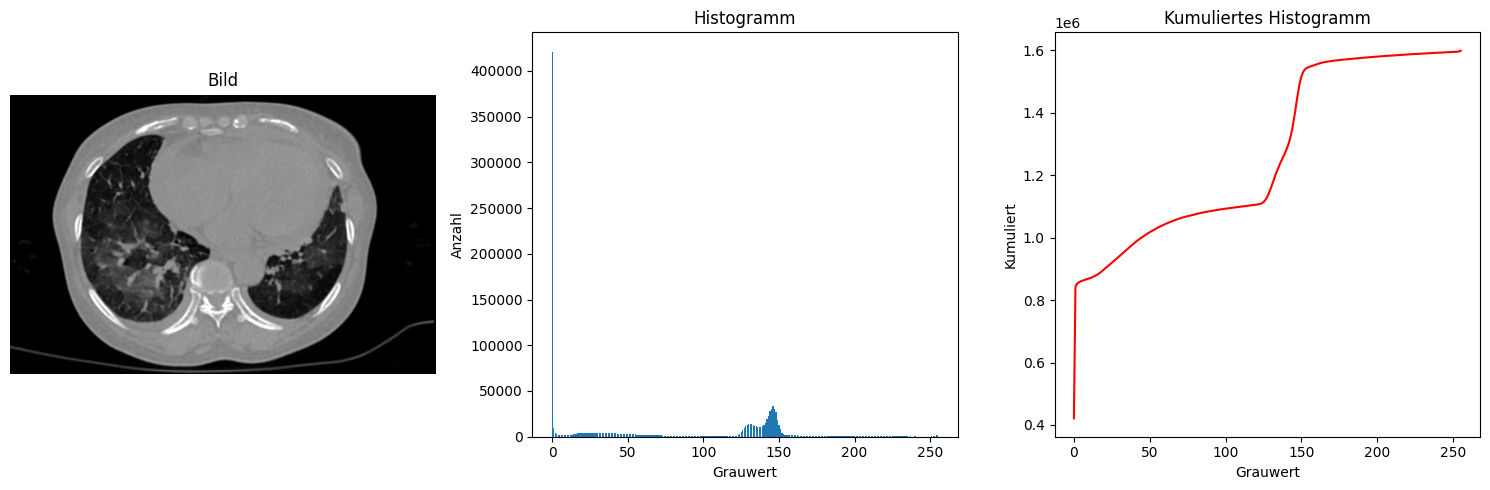

In [25]:
histo = myHist(img_Abdomen)
cumHisto = myCumHist(img_Abdomen)

# anzeigen von Bild und Histogrammen
displayImageAndAllHist(img_Abdomen, histo, cumHisto)

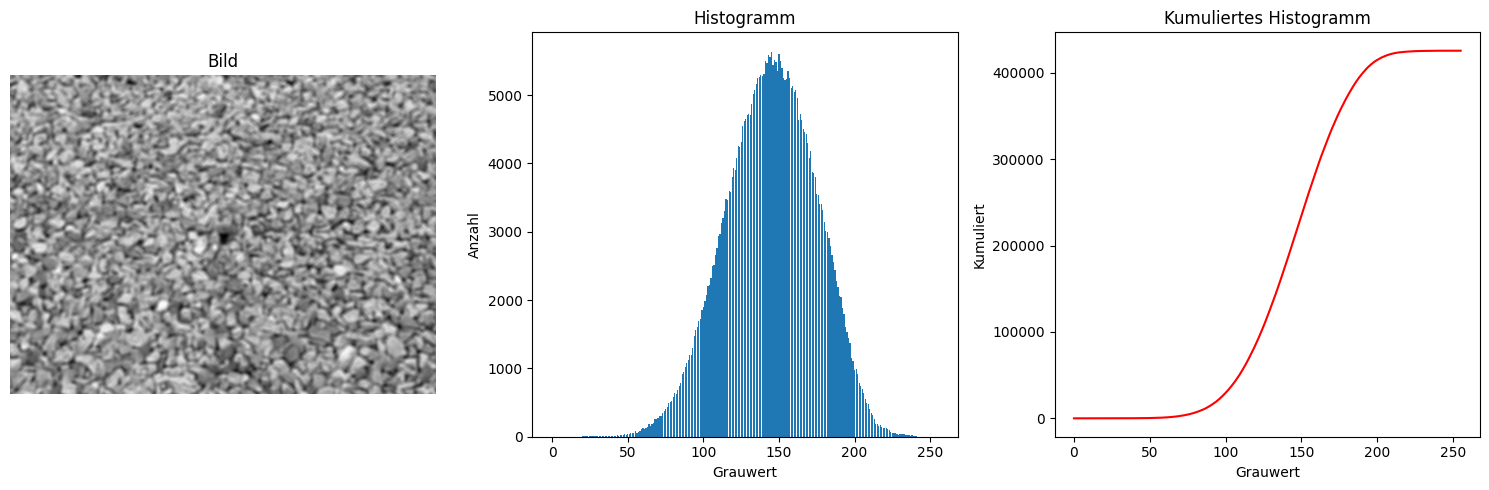

In [28]:
histo = myHist(img_stones1)
cumHisto = myCumHist(img_stones1)
displayImageAndAllHist(img_stones1, histo, cumHisto)


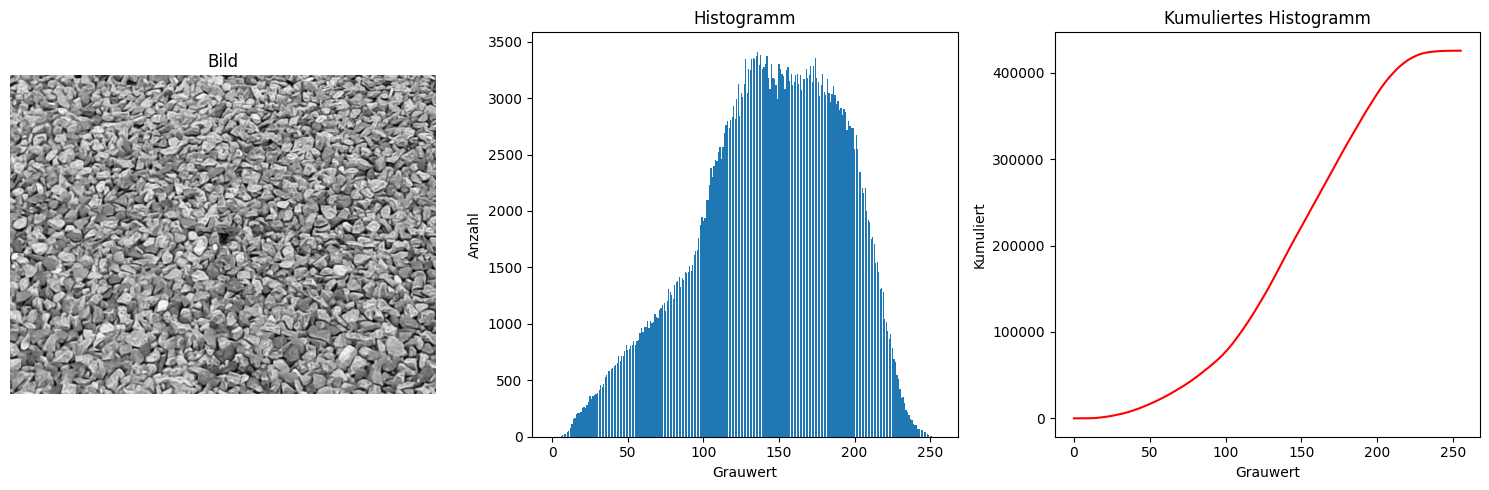

In [29]:
histo = myHist(img_stones3)
cumHisto = myCumHist(img_stones3)
displayImageAndAllHist(img_stones3, histo, cumHisto)
